<a href="https://colab.research.google.com/github/bikram-sahu/Time-Series/blob/main/AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
from datetime import datetime

In [ ]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

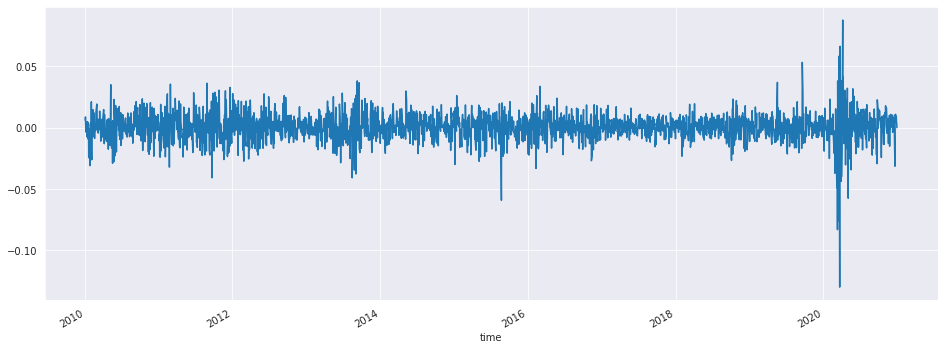

In [ ]:
nifty_close_df = pd.read_csv("nifty_close.csv")
nifty_close_df.columns = ["time", "value"]

nifty_close_df['time'] = pd.to_datetime(nifty_close_df['time'])
nifty_close_df.set_index('time', inplace=True)
logic = {'value':'last'}
nifty_close_df = nifty_close_df.resample('D').apply(logic)
nifty_close_df.dropna(inplace=True)
returns = nifty_close_df.value.pct_change().dropna()
#returns = returns.asfreq(pd.infer_freq(returns.index))
fig, ax = plt.subplots()
ax = returns.plot(ax=ax)

In [ ]:
lb_period = 126

actual_value = []
predictions = []

for i in range(lb_period, returns.shape[0]-1):
  windowed_data = returns[i-lb_period: i]
  label = returns[i]
  actual_value.append(label)

  mod = AutoReg(returns, 42, old_names=False)
  res = mod.fit()
  predictions.append(res.predict(start=returns.index[i], end=returns.index[i]).to_list()[0])


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:

In [ ]:
df = pd.DataFrame([actual_value, predictions]).T
df.columns = ['Actual', 'Prediction']
df = df.applymap(lambda x: 1 if x>0 else 0)
df

,Actual,Prediction
0,1,0
1,0,1
2,1,0
3,1,1
4,1,1
...,...,...
544,1,1
545,1,0
546,1,1
547,1,0


In [ ]:
from sklearn.metrics import average_precision_score, accuracy_score, f1_score, classification_report
average_precision = average_precision_score(df.Actual, df.Prediction)

#print('Average precision-recall score: {0:0.2f}'.format(
#      average_precision))

#print('accuracy_score: {0:0.2f}'.format(accuracy_score(df.Actual, df.Prediction)))
#print('F1 Score: {0:0.2f}'.format(f1_score(df.Actual, df.Prediction)))
report = classification_report(df.Actual, df.Prediction, output_dict=True)
report

{'0': {'f1-score': 0.3523035230352304,
  'precision': 0.52,
  'recall': 0.26639344262295084,
  'support': 244},
 '1': {'f1-score': 0.6721536351165981,
  'precision': 0.5778301886792453,
  'recall': 0.8032786885245902,
  'support': 305},
 'accuracy': 0.5646630236794171,
 'macro avg': {'f1-score': 0.5122285790759142,
  'precision': 0.5489150943396226,
  'recall': 0.5348360655737705,
  'support': 549},
 'weighted avg': {'f1-score': 0.5299980297471013,
  'precision': 0.5521278825995808,
  'recall': 0.5646630236794171,
  'support': 549}}

In [ ]:
df = pd.DataFrame()
mod = AutoReg(returns[0:6*4], 8, old_names=False)
res = mod.fit()
pred = res.predict(start=returns.index[6*4], end=returns.index[6*4])
val = pred.to_list()
val

[-0.006712080384042958]

In [ ]:
mod = AutoReg(returns[0:6*4], 8, old_names=False)
res = mod.fit()
pred = res.predict(start=returns.index[6*4], end=returns.index[6*4])
df.append(pred,ignore_index=True)

,2010-06-27
0,-0.006712


In [ ]:
returns[0:6]

time
2010-01-10    0.008402
2010-01-17    0.001420
2010-01-24   -0.041164
2010-01-31   -0.030570
2010-02-07   -0.025563
2010-02-14    0.014630
Freq: W-SUN, Name: value, dtype: float64

In [ ]:
returns[6]

0.0037394988450023536

In [ ]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                   62
Model:                     AutoReg(3)   Log Likelihood                 109.469
Method:               Conditional MLE   S.D. of innovations              0.038
Date:                Tue, 06 Jul 2021   AIC                             -6.379
Time:                        08:46:24   BIC                             -6.203
Sample:                    11-24-2019   HQIC                            -6.310
                         - 01-03-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.006      0.448      0.654      -0.009       0.014
value.L1       0.0466      0.169      0.275      0.783      -0.285       0.378
value.L2       0.1596      0.116      1.376      0.1

In [ ]:
sel = ar_select_order(returns, 30, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                   62
Model:                    AutoReg(30)   Log Likelihood                 178.270
Method:               Conditional MLE   S.D. of innovations              0.001
Date:                Tue, 06 Jul 2021   AIC                            -11.980
Time:                        08:46:56   BIC                            -10.514
Sample:                    05-31-2020   HQIC                           -11.494
                         - 01-03-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0359      0.001     41.943      0.000       0.034       0.038
value.L1      -0.7630      0.029    -26.423      0.000      -0.820      -0.706
value.L2      -0.2327      0.028     -8.425      0.0

In [ ]:
sel.ar_lags

array([], dtype=int64)

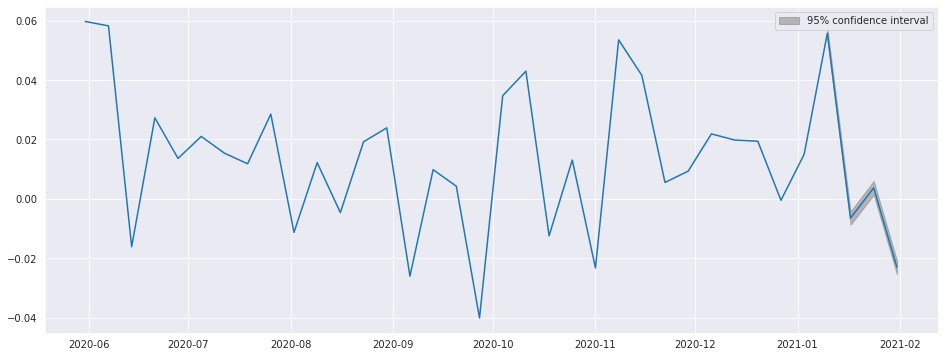

In [ ]:
fig = res.plot_predict(0,65)

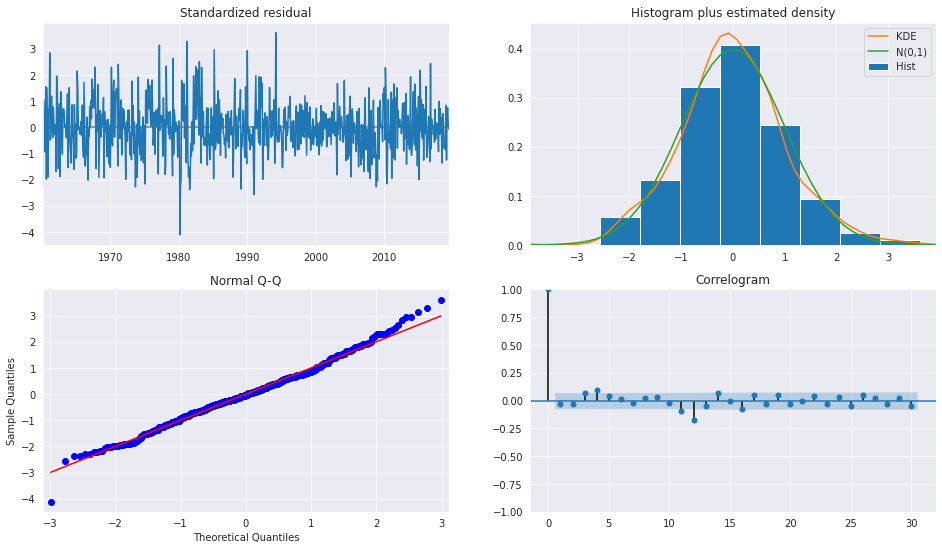

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [ ]:
mod = AutoReg(returns, 30, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  574
Model:                    AutoReg(30)   Log Likelihood               -1225.021
Method:               Conditional MLE   S.D. of innovations              2.300
Date:                Tue, 06 Jul 2021   AIC                              1.784
Time:                        06:09:01   BIC                              2.036
Sample:                            30   HQIC                             1.882
                                  574                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2537      0.110      2.297      0.022       0.037       0.470
y.L1           0.0439      0.043      1.024      0.306      -0.040       0.128
y.L2           0.0519      0.043      1.212      0.2

In [ ]:
res = mod.fit(cov_type="HC0")
print(res.summary())


                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  574
Model:                     AutoReg(3)   Log Likelihood               -1294.812
Method:               Conditional MLE   S.D. of innovations              2.337
Date:                Tue, 06 Jul 2021   AIC                              1.715
Time:                        04:41:26   BIC                              1.753
Sample:                             3   HQIC                             1.730
                                  574                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1898      0.110      1.725      0.085      -0.026       0.405
value.L1       0.0368      0.061      0.601      0.548      -0.083       0.157
value.L2       0.0556      0.052      1.067      0.2

In [ ]:
returns

,value
time,
2010-01-10,0.840215
2010-01-17,0.142047
2010-01-24,-4.116370
2010-01-31,-3.056990
2010-02-07,-2.556303
...,...
2020-12-06,2.233026
2020-12-13,1.925550
2020-12-20,1.825535


In [ ]:
sel = ar_select_order(returns, 5, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  574
Model:                     AutoReg(0)   Log Likelihood               -1303.184
Method:               Conditional MLE   S.D. of innovations              2.343
Date:                Tue, 06 Jul 2021   AIC                              1.710
Time:                        04:41:41   BIC                              1.725
Sample:                             0   HQIC                             1.716
                                  574                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1999      0.098      2.044      0.041       0.008       0.392


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
fig = res.plot_predict(720, 840)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: ignored

<Figure size 1152x432 with 0 Axes>

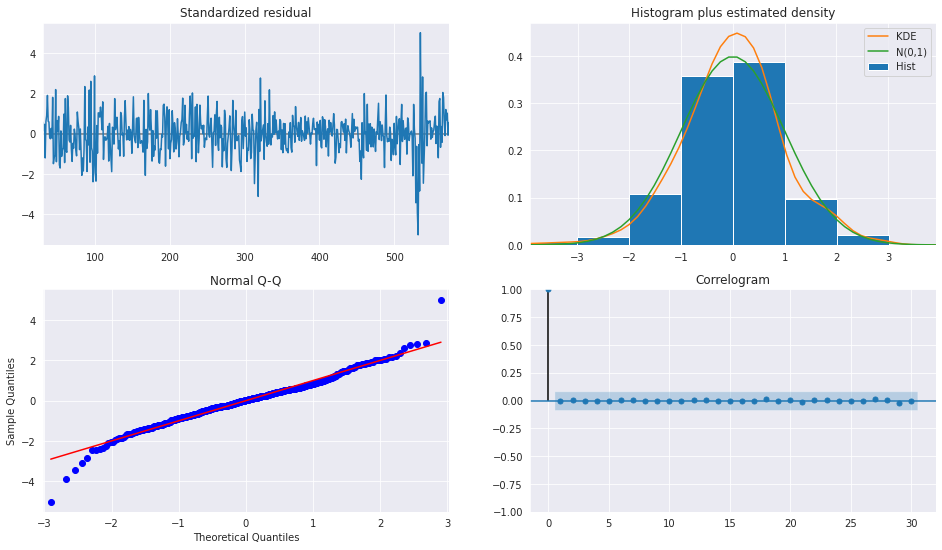

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

# Seasonal Dynamics

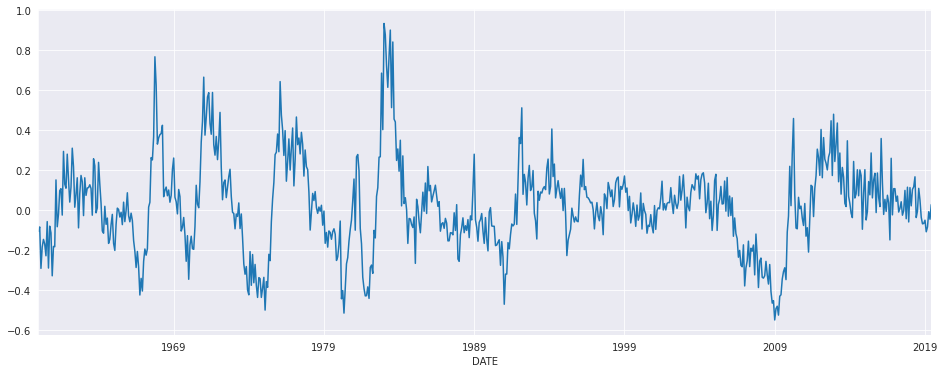

In [ ]:
yoy_housing = data.HOUSTNSA.pct_change(12).resample("MS").last().dropna()
_, ax = plt.subplots()
ax = yoy_housing.plot(ax=ax)

In [ ]:
sel = ar_select_order(yoy_housing, 13, old_names=False)
sel.ar_lags

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
sel = ar_select_order(yoy_housing, 13, glob=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  714
Model:             Restr. AutoReg(13)   Log Likelihood                 589.177
Method:               Conditional MLE   S.D. of innovations              0.104
Date:                Mon, 05 Jul 2021   AIC                             -4.496
Time:                        20:55:43   BIC                             -4.444
Sample:                    02-01-1961   HQIC                            -4.476
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0035      0.004      0.875      0.382      -0.004       0.011
HOUSTNSA.L1      0.5640      0.035     16.167      0.000       0.496       0.632
HOUSTNSA.L2      0.2347      0.038      6.23

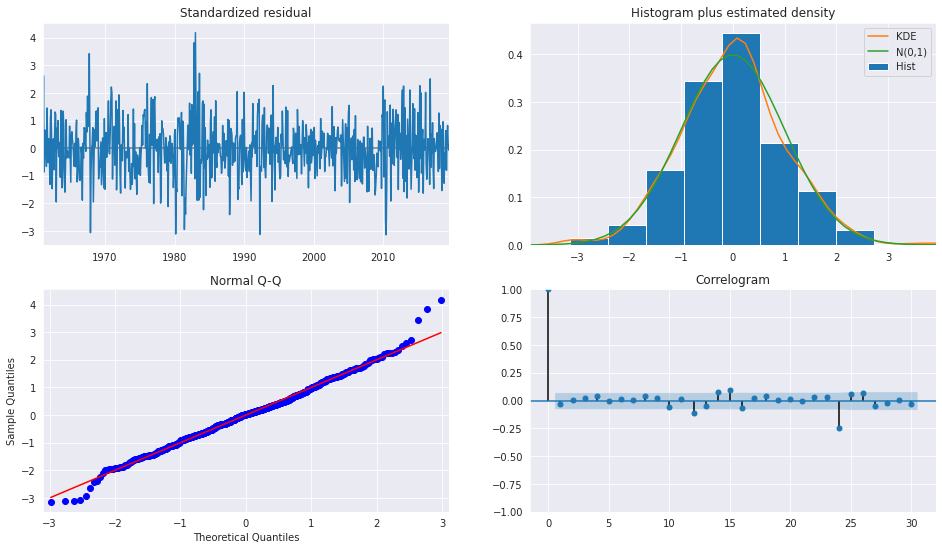

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)


In [ ]:
sel = ar_select_order(yoy_housing, 13, glob=True, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                               AutoReg Model Results                                
Dep. Variable:                     HOUSTNSA   No. Observations:                  714
Model:             Restr. Seas. AutoReg(13)   Log Likelihood                 590.875
Method:                     Conditional MLE   S.D. of innovations              0.104
Date:                      Mon, 05 Jul 2021   AIC                             -4.469
Time:                              20:56:14   BIC                             -4.346
Sample:                          02-01-1961   HQIC                            -4.422
                               - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0167      0.014      1.215      0.224      -0.010       0.044
s(2,12)         -0.0179      0.019     -0.931      0.352      -0.056       0.